In [47]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  2017nat_housing_survey1.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [49]:
# File to Load 
file_to_load = "../dataset/2017nat_housing_survey1.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980
5,11000008,1919,3.0,NaN,5,NaN,NaN,7.0,7.0,2,1,1,9,NaN,99998
6,11000009,1970,5.0,NaN,6,NaN,2.0,NaN,NaN,1,3,3,2,877854.0,99998
7,11000010,1970,3.0,1.0,7,1.0,3.0,8.0,8.0,1,2,3,2,NaN,99998
8,11000012,1960,2.0,1.0,3,1.0,NaN,3.0,2.0,1,1,1,7,NaN,99998
9,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980


# Cleaning and Preprocessing Data for Machine Learning

In [50]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL          0
YRBUILT          0
UNITSIZE      7857
NHQSCHOOL    14956
TOTROOMS         0
NHQSCRIME    11086
LOTSIZE      21459
RATINGHS     10809
RATINGNH     10889
PORCH            0
BATHROOMS        0
BEDROOMS         0
BLD              0
MARKETVAL    26801
OMB13CBSA        0
dtype: int64

In [51]:
# Ignore rows where there is no market values
housing_data = housing_data.dropna()

In [25]:
# Check again after we drop NULL
housing_data.isnull().sum()

CONTROL      0
YRBUILT      0
UNITSIZE     0
NHQSCHOOL    0
TOTROOMS     0
NHQSCRIME    0
LOTSIZE      0
RATINGHS     0
RATINGNH     0
PORCH        0
BATHROOMS    0
BEDROOMS     0
BLD          0
MARKETVAL    0
OMB13CBSA    0
dtype: int64

## Build model

In [52]:
from sklearn.model_selection import train_test_split

X = housing_data[["UNITSIZE"]].values.reshape(-1, 1)
y = housing_data["MARKETVAL"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(20321, 1) (20321, 1)


In [53]:
# Built the model
from sklearn.tree import DecisionTreeRegressor  

model = DecisionTreeRegressor(random_state = 0)  
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [54]:
# Print coefficient R2
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.09696886803954674

## Predict

In [55]:
y_predict = model.predict(X_test)
print(y_predict)

[528858.74679629 350809.19223896 528858.74679629 ... 425556.08270004
 218649.14764948 425556.08270004]


## Visualize the Prediction

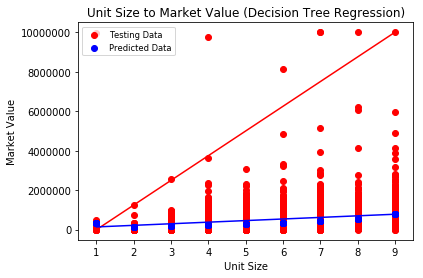

In [59]:
# Trend Line
X_test_min = np.array([[X_test.min()]])
X_test_max = np.array([[X_test.max()]])
y_test_min = np.array([[y_test.min()]])
y_test_max = np.array([[y_test.max()]])

y_predict_min = np.array([[y_predict.min()]])
y_predict_max = np.array([[y_predict.max()]])

# scatter plot for test data 
plt.scatter(X_test, y_test, color = 'red', label='Testing Data') 
plt.plot([X_test_min[0], X_test_max[0]], [y_test_min[0], y_test_max[0]], c='red')
  
# plot predicted data 
plt.scatter(X_test, y_predict, color = 'blue', label='Predicted Data')  
plt.plot([X_test_min[0], X_test_max[0]], [y_predict_min[0], y_predict_max[0]], c='blue')

# specify title 
plt.title('Unit Size to Market Value (Decision Tree Regression)')  
  
# specify X axis label 
plt.xlabel('Unit Size') 
  
# specify Y axis label 
plt.ylabel('Market Value') 

plt.ticklabel_format(useOffset=False, style='plain')

plt.legend(loc='upper left', fontsize='small')

# Save the figure to output
plt.savefig("../output/Regression_DecisionTree_National.png")

In [45]:
plt.show()